#                                   CROP RECOMMENDATION SYSTEM

# Import all required library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data analysis 

In [2]:
# Read the excel file
df = pd.read_csv('crop_data_train.csv')
df

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2475,25.864755,86.674680,6.662245,41.165548,watermelon
2476,26.706078,81.141495,6.944640,51.510336,watermelon
2477,26.440195,80.919343,6.507111,47.818476,watermelon
2478,26.283443,84.424789,6.520663,50.786697,watermelon


In [3]:
df.isnull()

,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2475,False,False,False,False,False
2476,False,False,False,False,False
2477,False,False,False,False,False
2478,False,False,False,False,False


In [4]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.nunique(axis=0)

temperature    2400
humidity       2480
ph             2480
rainfall       2480
label            31
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2480 non-null   float64
 1   humidity     2480 non-null   float64
 2   ph           2480 non-null   float64
 3   rainfall     2480 non-null   float64
 4   label        2480 non-null   object 
dtypes: float64(4), object(1)
memory usage: 97.0+ KB


In [7]:
df[(df['rainfall'] < 0) | (df['ph']<0)| (df['ph']>14)]

,temperature,humidity,ph,rainfall,label


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2475    False
2476    False
2477    False
2478    False
2479    False
Length: 2480, dtype: bool

In [9]:
df.label.unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [10]:
x=df.label.unique()
print(sorted(x))

['Adzuki Beans', 'Black gram', 'Chickpea', 'Coconut', 'Coffee', 'Cotton', 'Ground Nut', 'Jute', 'Kidney Beans', 'Lentil', 'Moth Beans', 'Mung Bean', 'Peas', 'Pigeon Peas', 'Rubber', 'Sugarcane', 'Tea', 'Tobacco', 'apple', 'banana', 'grapes', 'maize', 'mango', 'millet', 'muskmelon', 'orange', 'papaya', 'pomegranate', 'rice', 'watermelon', 'wheat']


In [11]:
df['label'].value_counts()

rice            80
Moth Beans      80
pomegranate     80
papaya          80
orange          80
muskmelon       80
mango           80
apple           80
grapes          80
banana          80
Chickpea        80
Pigeon Peas     80
Adzuki Beans    80
Black gram      80
Coconut         80
Kidney Beans    80
wheat           80
Tobacco         80
Sugarcane       80
Rubber          80
Peas            80
Ground Nut      80
Cotton          80
Coffee          80
Jute            80
Lentil          80
maize           80
millet          80
Tea             80
Mung Bean       80
watermelon      80
Name: label, dtype: int64

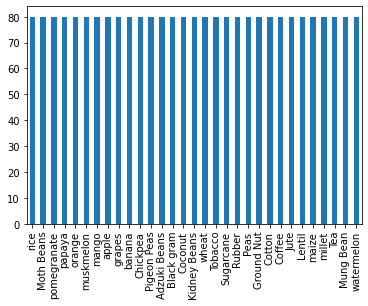

In [12]:
df["label"].value_counts().plot(kind="bar")
plt.show()

In [13]:
df.describe()

,temperature,humidity,ph,rainfall
count,2480.000000,2480.000000,2480.000000,2480.000000
mean,27.106207,65.977510,6.360440,110.148731
std,7.539481,24.026417,0.804480,64.065740
min,8.825675,10.086890,3.504752,20.211267
25%,22.810495,55.186269,5.893393,65.021328
50%,26.027370,68.931169,6.325531,97.356366
75%,29.368447,84.473914,6.831795,139.984998
max,54.986760,99.969060,9.926212,397.315380


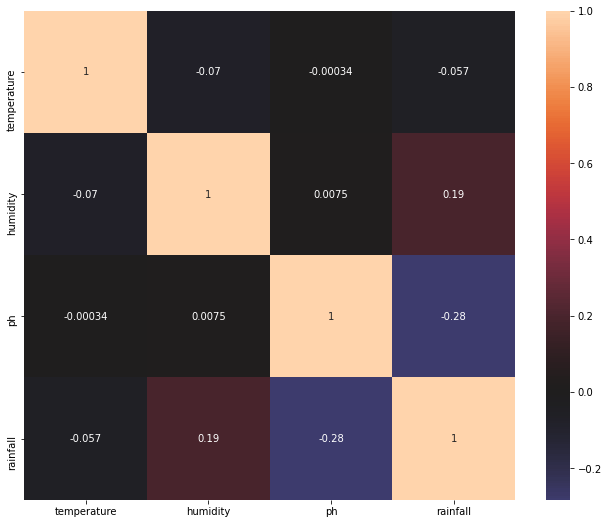

In [14]:
plt.figure(figsize = (11,9))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

c:\users\abhuy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

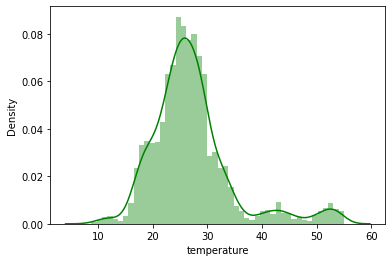

In [15]:
sns.distplot(df['temperature'] , color ='green')

c:\users\abhuy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

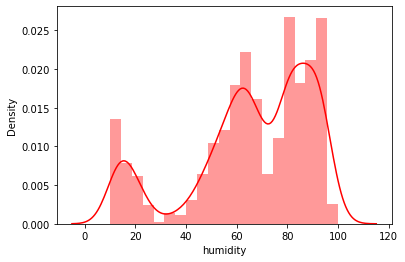

In [16]:
sns.distplot(df['humidity'] , color ='red')

c:\users\abhuy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

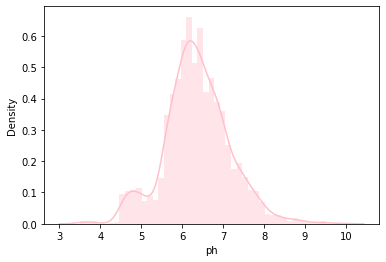

In [17]:
sns.distplot(df['ph'] , color ='pink')

c:\users\abhuy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

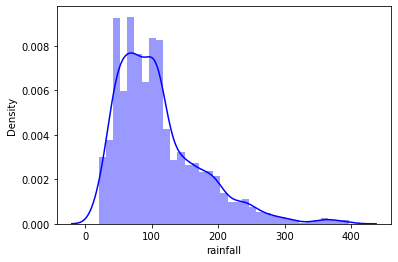

In [18]:
sns.distplot(df['rainfall'],color ='blue')

In [19]:
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('label',axis=1)
y = df['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100)

# Train

**Decision Tree Classification**

In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_train,y_train)

1.0

# Performance Evaluation

In [25]:
model.score(X_test,y_test)

0.8870967741935484

**Predicting the Test set results**

In [26]:
prediction=model.predict(X_test)

**Accuracy**

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accu_score=accuracy_score(prediction,y_test)
print("Decision Tree Classification's Accuracy :",accu_score)

Decision Tree Classification's Accuracy : 0.8870967741935484


**Classification Report**

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        32
  Black gram       0.95      0.83      0.89        24
    Chickpea       1.00      1.00      1.00        25
     Coconut       1.00      0.91      0.95        23
      Coffee       0.77      0.87      0.82        31
      Cotton       0.96      0.86      0.91        29
  Ground Nut       0.73      1.00      0.85        22
        Jute       0.79      0.73      0.76        30
Kidney Beans       1.00      1.00      1.00        25
      Lentil       0.97      1.00      0.99        33
  Moth Beans       0.90      0.79      0.84        24
   Mung Bean       0.97      1.00      0.98        30
        Peas       1.00      1.00      1.00        35
 Pigeon Peas       0.77      0.69      0.73        29
      Rubber       0.96      1.00      0.98        23
   Sugarcane       0.75      0.75      0.75        24
         Tea       0.96      0.90      0.93        30
     Tobacco       1.00    

**Cross validation score**

In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y,cv=10)
score

array([0.91935484, 0.9233871 , 0.91935484, 0.91532258, 0.88709677,
       0.89516129, 0.9233871 , 0.92741935, 0.89516129, 0.89919355])

In [31]:
score.mean()

0.9104838709677419

# Future Prediction

In [32]:
a=model.predict([[26.52872817,80.12267476,6.158376967,218.9163567]])
print("crop to be yield :",a)

crop to be yield : ['rice']


In [33]:
b=model.predict([[30.66938267,64.33053444,6.232369623,78.68708298]])
print("crop to be yield :",b)

crop to be yield : ['Ground Nut']


# GUI

In [34]:
from tkinter import *
#------------------------------------------------ TKINTER LOOP STARTING -----------------------------------------

root=Tk()   # Tkinter object

#---------------------------------- OUTPUT BOX -----------------------------------------------------------------

scvalue = StringVar()
screen = Entry(root, textvariable=scvalue, font="comicsansms 25 bold")
screen.place(x=620, y=600)
Label(root,text="Result :",font="comicsansms 25 bold",bg='#ffe6e6').place(x=490,y=600)

#----------------------------------------- CALCULATE AND DISPLAY RESULT -------------------------------------------------

def calculate():
    indept_vars = [[]]
    indept_vars[0].append(humidity_val.get())
    indept_vars[0].append(temp_val.get())
    indept_vars[0].append(ph_val.get())
    indept_vars[0].append(rainfall_val.get())
    result=model.predict(indept_vars)[0]
    scvalue.set(result)
    
#------------------------------------------------SCREEN-----------------------------------------------------------------

screen_width=1520
screen_height=780
root.title("Crop yield Prediction")
root.geometry(f"{screen_width}x{screen_height}")
root.minsize(screen_width,screen_height)
root.maxsize(screen_width,screen_height)
root.configure(background='#ffe6e6')

#--------------------------------------------------HEADING-------------------------------------------------------------

topic=Label(root,text="CROP YIELD PREDICTION",font="comicsansms 30 bold",bg='#ffe6e6')
topic.pack(pady=10)

#-----------------------------------------------------COLUMNS----------------------------------------------------------

Label(root,text="TEMPERATURE :",font="comicsansms 25 bold",bg='#ffe6e6').place(x=200,y=150)
Label(root,text="HUMIDITY :",font="comicsansms 25 bold",bg='#ffe6e6').place(x=290,y=230)
Label(root,text="PH :",font="comicsansms 25 bold",bg='#ffe6e6').place(x=405,y=310)
Label(root,text="RAINFALL :",font="comicsansms 25 bold",bg='#ffe6e6').place(x=285,y=390)

#---------------------------------------------------VARIABLES---------------------------------------------------------

humidity_val=DoubleVar()
temp_val=DoubleVar()
ph_val=DoubleVar()
rainfall_val=DoubleVar()

#-----------------------------------------------------VALUE ENTRY-----------------------------------------------------

humidity_entry=Entry(root,textvariable=humidity_val,font="comicsansms 25 bold")
temp_entry=Entry(root,textvariable=temp_val,font="comicsansms 25 bold")
ph_entry=Entry(root,textvariable=ph_val,font="comicsansms 25 bold")
rainfall_entry=Entry(root,textvariable=rainfall_val,font="comicsansms 25 bold")
humidity_entry.place(x=500,y=150)
temp_entry.place(x=500,y=230)
ph_entry.place(x=500,y=310)
rainfall_entry.place(x=500,y=390)

#--------------------------------------------------------SUBMIT BUTTON-------------------------------------------------

submit_btn=Button(text="SUBMIT",padx=10,pady=5,font="comicsansms 15 bold",command=calculate)
submit_btn.place(x=720,y=500)

#-----------------------------------------------------TKINTER ENDING------------------------------------------------------

root.mainloop()